# Doğrusal Olmayan Regresyon Modelleri

In [1]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

# KNN

In [3]:
#Gözlemlerin birbirine olan benzerlikleri üzerinden tahmin yapılır
#k seç, uzaklık, k gözlemini seç, 

In [4]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [5]:
X_train.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
183,328.0,91.0,12.0,51.0,43.0,33.0,2.0,342.0,94.0,12.0,51.0,44.0,33.0,145.0,59.0,8.0,1,0,1
229,514.0,144.0,0.0,67.0,54.0,79.0,9.0,4739.0,1169.0,13.0,583.0,374.0,528.0,229.0,453.0,15.0,1,0,1
286,593.0,152.0,23.0,69.0,75.0,53.0,6.0,2765.0,686.0,133.0,369.0,384.0,321.0,315.0,10.0,6.0,0,1,0
102,233.0,49.0,2.0,41.0,23.0,18.0,8.0,1350.0,336.0,7.0,166.0,122.0,106.0,102.0,132.0,10.0,0,0,0
153,341.0,95.0,6.0,48.0,42.0,20.0,10.0,2964.0,808.0,81.0,379.0,428.0,221.0,158.0,4.0,5.0,1,1,1


## Model & Tahmin

In [6]:
knn_model = KNeighborsRegressor().fit(X_train, y_train)

In [7]:
knn_model

KNeighborsRegressor()

In [8]:
knn_model.n_neighbors

5

In [9]:
knn_model.metric

'minkowski'

In [10]:
dir(knn_model)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_algorithm_metric',
 '_check_n_features',
 '_estimator_type',
 '_fit',
 '_fit_X',
 '_fit_method',
 '_get_param_names',
 '_get_tags',
 '_kneighbors_reduce_func',
 '_more_tags',
 '_pairwise',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_tree',
 '_validate_data',
 '_y',
 'algorithm',
 'effective_metric_',
 'effective_metric_params_',
 'fit',
 'get_params',
 'kneighbors',
 'kneighbors_graph',
 'leaf_size',
 'metric',
 'metric_params',
 'n_features_in_',
 'n_jobs',
 'n_neighbors',
 'n_samples_fit_',
 'p',
 'predict',
 'radius',
 'sc

In [11]:
knn_model.predict(X_test)[0:5]

array([ 510.3334,  808.3334,  772.5   ,  125.5   , 1005.    ])

In [12]:
y_pred = knn_model.predict(X_test)

In [13]:
np.sqrt(mean_squared_error(y_test, y_pred))

426.6570764525201

In [14]:
knn_model

KNeighborsRegressor()

In [15]:
range(10)

range(0, 10)

In [16]:
RMSE = []

for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    RMSE.append(rmse)
    print("k=", k, "için RMSE değeri:", rmse)


k= 1 için RMSE değeri: 455.03925390751965
k= 2 için RMSE değeri: 415.99629571490965
k= 3 için RMSE değeri: 420.6765370082348
k= 4 için RMSE değeri: 428.8564674588792
k= 5 için RMSE değeri: 426.6570764525201
k= 6 için RMSE değeri: 423.5071669008732
k= 7 için RMSE değeri: 414.9361222421057
k= 8 için RMSE değeri: 413.7094731463598
k= 9 için RMSE değeri: 417.84419990871265
k= 10 için RMSE değeri: 421.6252180741266


In [ ]:
#GridSearchCV

In [20]:
knn_params = {"n_neighbors": np.arange(1,50,1)}

In [21]:
knn = KNeighborsRegressor()

In [22]:
knn_cv_model = GridSearchCV(knn, knn_params, cv = 10).fit(X_train, y_train)

In [23]:
knn_cv_model.best_params_

{'n_neighbors': 8}

In [24]:
#final model
knn_tuned = KNeighborsRegressor(n_neighbors = knn_cv_model.best_params_["n_neighbors"]).fit(X_train, y_train)

In [25]:
y_pred = knn_tuned.predict(X_test)

In [26]:
np.sqrt(mean_squared_error(y_test, y_pred))

413.7094731463598

# Destek Vektör Regresyonu (Support Vector Regression)

Güçlü ve esnek tekniklerinden birisidir. Robust regression tekniğidir. Aykırı gözlemlere karşı dayanıklıdır.

Destek vektör regresyonu epsilon komşuluğu bırakır.
ksi değerleri aykırı gözlemleri. C kontrol parametresi vardır.



In [27]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Model & Tahmin

In [28]:
svr_model = SVR("linear").fit(X_train, y_train)

In [45]:
svr_model

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [29]:
svr_model.predict(X_train)[0:5]

array([219.32622169, 702.4303869 , 623.2055964 , 153.77538476,
       463.15190834])

In [30]:
svr_model.predict(X_test)[0:5]

array([679.14754685, 633.72883069, 925.68640849, 270.28463621,
       530.26659184])

In [31]:
svr_model.intercept_

array([-80.15196151])

In [32]:
svr_model.coef_

array([[ -1.21839037,   6.09602969,  -3.67574533,   0.14217075,
          0.51435919,   1.28388986,  12.55922537,  -0.08693755,
          0.46597184,   2.98259944,   0.52944523,  -0.79820799,
         -0.16015534,   0.30872794,   0.28842348,  -1.79560067,
          6.41868985, -10.74313783,   1.33374317]])

In [33]:
#test
y_pred = svr_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

370.04084185624924

## Model Tuning

In [34]:
svr_model = SVR("linear") 

In [85]:
svr_model

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [35]:
svr_params = {"C": [0.1,0.5,1,3]}

In [37]:
svr_cv_model = GridSearchCV(svr_model, svr_params, cv = 5).fit(X_train, y_train)

In [38]:
svr_cv_model.best_params_

{'C': 0.5}

In [39]:
svr_cv_model = GridSearchCV(svr_model, svr_params, cv = 5, verbose = 2, n_jobs = -1).fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.2min finished


In [40]:
svr_cv_model.best_params_

{'C': 0.5}

In [41]:
svr_tuned = SVR("linear", C = 0.5).fit(X_train, y_train)

In [42]:
y_pred = svr_tuned.predict(X_test)

In [43]:
np.sqrt(mean_squared_error(y_test, y_pred))

367.9874739022889

# Yapay Sinir Ağları

In [44]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Model & Tahmin

In [45]:
scaler = StandardScaler()

In [46]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [47]:
scaler.fit(X_test)
X_test_scaled = scaler.transform(X_test)

In [48]:
mlp_model = MLPRegressor().fit(X_train_scaled, y_train)

In [194]:
mlp_model

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [49]:
mlp_model.predict(X_test_scaled)[0:5]

array([20.54501974, 36.46932929, 70.00799807, 17.45045836, 22.6196656 ])

In [50]:
y_pred = mlp_model.predict(X_test_scaled)
np.sqrt(mean_squared_error(y_test, y_pred))

660.9394487604229

## Model Tuning

In [199]:
mlp_model

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [51]:
mlp_params = {"alpha": [0.1, 0.01, 0.02, 0.001, 0.0001], 
             "hidden_layer_sizes": [(10,20), (5,5), (100,100)]}
#2 katman 10 nöron ve 20 nöron gibi

In [52]:
mlp_cv_model = GridSearchCV(mlp_model, mlp_params, cv = 10, verbose = 2, n_jobs = -1).fit(X_train_scaled, y_train)

Fitting 10 folds for each of 15 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   21.8s finished


In [53]:
mlp_cv_model.best_params_

{'alpha': 0.001, 'hidden_layer_sizes': (100, 100)}

In [54]:
#final
mlp_tuned = MLPRegressor(alpha = 0.001, hidden_layer_sizes = (100,100)).fit(X_train_scaled, y_train)

In [55]:
y_pred = mlp_tuned.predict(X_test_scaled)

In [56]:
np.sqrt(mean_squared_error(y_test, y_pred))

359.8267828549102

# CART (Classification and Regression Tree)

In [19]:
#Veri içersiindeki karmaşık yapıları basit karar yapılarına dönüştürür.
#Overfite eğilimli, büyük verisetlerinde güzel sonuç vermezler.
#sonuç, alana karşılık gelen verilerin ortalamasıdır.
#değişkenleri yukarıdan aşağı düşündüğümüzde önem sırasına göre sıralanır.
#dallanma işlemleri saflık ölçüsü ile gerçekleşir.

In [20]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [21]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

## Model & Tahmin

In [22]:
cart_model = DecisionTreeRegressor(max_leaf_nodes = 10)

In [23]:
cart_model.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=10)

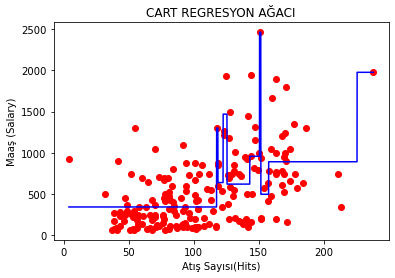

In [24]:
X_grid = np.arange(min(np.array(X_train)),max(np.array(X_train)), 0.01) 
X_grid = X_grid.reshape((len(X_grid), 1))  
  
plt.scatter(X_train, y_train, color = 'red') 
  
plt.plot(X_grid, cart_model.predict(X_grid), color = 'blue')  

plt.title('CART REGRESYON AĞACI')  
plt.xlabel('Atış Sayısı(Hits)') 
plt.ylabel('Maaş (Salary)') ;

In [25]:
#tek degiskenli tahmin

In [26]:
cart_model.predict(X_test)[0:5]

array([621.96792308, 958.61111111, 621.96792308, 345.20115517,
       345.20115517])

In [27]:
y_pred = cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

486.34593105235456

In [28]:
#tum degiskenler

In [29]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [30]:
cart_model = DecisionTreeRegressor().fit(X_train, y_train)

In [31]:
y_pred = cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

479.9721740557025

## Model Tuning

In [33]:
?cart_model


In [38]:
cart_model = DecisionTreeRegressor(max_depth = 2).fit(X_train, y_train)
y_pred = cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

417.00487927726425

In [40]:
?cart_model

In [43]:
#max depth 
#min samples split: bölümdeki veri 

In [42]:
cart_params = {"max_depth": [2,3,4,5,10,20],
              "min_samples_split": [2,10,5,30,50,10]}

In [44]:
cart_model = DecisionTreeRegressor()

In [45]:
cart_cv_model = GridSearchCV(cart_model, cart_params, cv = 10).fit(X_train, y_train)

In [46]:
cart_cv_model.best_params_

{'max_depth': 4, 'min_samples_split': 50}

In [47]:
#final model

In [48]:
cart_tuned = DecisionTreeRegressor(max_depth = 10, min_samples_split = 50).fit(X_train, y_train)

In [49]:
y_pred = cart_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

361.0876906511434

# Random Forests

In [2]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [ ]:
#bagging yaklasımı
#boostrap yöntemi ile oluşturulan karar ağacı
#overfite karşı çözüm önerisi
#rastgele örnekleme
#tekrar tekrar örnek çekmek
#Breiman 2001
#random subspace: rastgele değişken seçmek
#2/3 veri kullanılır. dışarıda kalanlarda performans ve değişken önemi belirlenmesi için kullanılır.


## Model & Tahmin

In [5]:
rf_model = RandomForestRegressor(random_state = 42).fit(X_train, y_train)

In [74]:
rf_model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [19]:
#ilkel test hatası
y_pred = rf_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

348.6776176416439

## Model Tuning

In [8]:
rf_model = RandomForestRegressor(random_state = 42).fit(X_train, y_train)
rf_model
#nestimators
#max feature en önemli iki parameter

RandomForestRegressor(random_state=42)

In [9]:
rf_params = {"max_depth": [5,8,10],
            "max_features": [2,5,10],
            "n_estimators": [200, 500, 1000, 2000],
            "min_samples_split": [2,10,80,100]}

#n estimator ağaç sayısı

In [10]:
rf_cv_model = GridSearchCV(rf_model, rf_params, cv = 10, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed: 12.5min finished


In [11]:
rf_cv_model.best_params_

{'max_depth': 8,
 'max_features': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

In [12]:
rf_model = RandomForestRegressor(random_state = 42, 
                                 max_depth = 8,
                                max_features = 2,
                                min_samples_split = 2,
                                 n_estimators = 200)
rf_tuned = rf_model.fit(X_train, y_train)

In [13]:
rf_tuned

RandomForestRegressor(max_depth=8, max_features=2, n_estimators=200,
                      random_state=42)

In [14]:
y_pred = rf_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

348.6776176416439

## Değişken Önem Düzeyi

In [17]:
rf_tuned.feature_importances_*100

array([5.83939512, 6.3008207 , 3.55409652, 4.19009209, 4.66682274,
       4.98433247, 7.38060012, 9.73911031, 8.6905022 , 7.87635556,
       8.72726849, 8.31591059, 9.70373415, 4.70960845, 2.05129065,
       1.85358891, 0.3831876 , 0.55522635, 0.47805698])

In [20]:
Importance

,Importance
AtBat,5.839395
Hits,6.300821
HmRun,3.554097
Runs,4.190092
RBI,4.666823
Walks,4.984332
Years,7.380600
CAtBat,9.739110
CHits,8.690502
CHmRun,7.876356


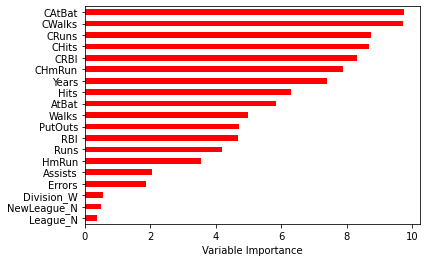

In [18]:
Importance = pd.DataFrame({'Importance':rf_tuned.feature_importances_*100}, 
                          index = X_train.columns)


Importance.sort_values(by = 'Importance', 
                       axis = 0, 
                       ascending = True).plot(kind = 'barh', 
                                              color = 'r', )

plt.xlabel('Variable Importance')
plt.gca().legend_ = None

# Gradient Boosting Machines

In [2]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [3]:
#briman(random forest cart) and friedman

#modeller serisi kuruldu.
#boosting: zayıf öğrencilier bir araya gelip güçlü öğrenci ortaya çıkar mı?
#adaboost: 
#adaboostun sınıflandırma ve regresyon problemlerine uyarlnama hali.

#tahmin artıklarının üzerine kurulur.
#gradient descent kullanılır.
#boosting + gradient descent

## Model & Tahmin

In [4]:
gbm_model = GradientBoostingRegressor().fit(X_train, y_train)

In [91]:
gbm_model

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [7]:
y_pred = gbm_model.predict(X_test)

In [8]:
np.sqrt(mean_squared_error(y_test, y_pred))

359.98255266949053

## Model Tuning

In [9]:
gbm_model = GradientBoostingRegressor().fit(X_train, y_train)
gbm_model

GradientBoostingRegressor()

In [11]:
?gbm_model
#max_depth: ağaç derinliği
#n_estimators: ağaç sayısı
#subsample: oluşturulacak ağacın- oran

In [12]:
gbm_params = {"learning_rate": [0.001,0.1,0.01],
             "max_depth": [3,5,8],
             "n_estimators": [100,200,500],
             "subsample": [1,0.5,0.8],
             "loss": ["ls","lad","quantile"]}

In [13]:
gbm_model = GradientBoostingRegressor().fit(X_train, y_train)

In [14]:
gbm_cv_model = GridSearchCV(gbm_model, 
                            gbm_params, 
                            cv = 10, 
                            n_jobs=-1, 
                            verbose = 2).fit(X_train, y_train)

Fitting 10 folds for each of 243 candidates, totalling 2430 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   35.2s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 2430 out of 2430 | elapsed:  7.0min finished


In [15]:
gbm_cv_model.best_params_

{'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'n_estimators': 100,
 'subsample': 0.5}

In [22]:
gbm_tuned=GradientBoostingRegressor(learning_rate=0.1,
                                   loss='lad' ,
                                    max_depth=3,
                                    n_estimators=100,
                                    subsample=0.5).fit(X_train,y_train)

In [23]:
y_pred = gbm_tuned.predict(X_test)

In [24]:
np.sqrt(mean_squared_error(y_test, y_pred))

326.6357035223884

In [21]:
#degisken onem duzeyleri

In [26]:
gbm_tuned.feature_importances_*100

array([ 7.10927175,  3.91255842,  3.95309461,  5.33141378,  4.23950576,
        5.34055749,  6.23252273,  5.4020665 , 11.30713668,  6.51913867,
       11.19203695,  7.30463108,  4.68459741,  6.85462728,  4.51600813,
        3.20265043,  0.99650995,  0.9569214 ,  0.94475098])

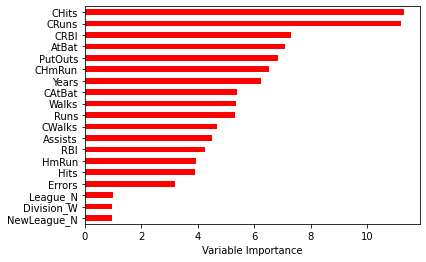

In [27]:
Importance = pd.DataFrame({'Importance':gbm_tuned.feature_importances_*100}, 
                          index = X_train.columns)


Importance.sort_values(by = 'Importance', 
                       axis = 0, 
                       ascending = True).plot(kind = 'barh', 
                                              color = 'r', )

plt.xlabel('Variable Importance')
plt.gca().legend_ = None

# XGBoost

In [29]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

## Model & Tahmin

In [30]:
!pip install xgboost

In [31]:
import xgboost

In [32]:
#gbm in hız ve tahmin performansını artırmak için optimize edilmişt
#ölçeklenbilir, hızlı, kaggle
#gbmden farkı hız ve tahmin performansı daha iyidir.

In [33]:
from xgboost import XGBRegressor

In [34]:
xgb_model=XGBRegressor().fit(X_train,y_train)

In [132]:
xgb

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [36]:
y_pred=xgb_model.predict(X_test)

In [37]:
np.sqrt(mean_squared_error(y_test, y_pred))

355.46515176059927

## Model Tuning

In [43]:
#colsample bytree : oluşturulacak oluşan ağacın değişkenlerden alınacak olan alt küme oranını ifade ediyo

In [40]:
xgb = XGBRegressor()
xgb

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None)

In [41]:
xgb_params = {"learning_rate": [0.1,0.01,0.5],
             "max_depth": [2,3,4,5,8],
             "n_estimators": [100,200,500,1000],
             "colsample_bytree": [0.4,0.7,1]}

In [42]:
xgb_cv_model  = GridSearchCV(xgb,xgb_params, cv = 10, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   17.6s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   39.7s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:  3.6min finished


In [44]:
xgb_cv_model.best_params_

{'colsample_bytree': 0.4,
 'learning_rate': 0.1,
 'max_depth': 2,
 'n_estimators': 1000}

In [72]:
xgb_tuned=XGBRegressor(colsample_bytree=0.4,
                      learning_rate=0.1,
                      max_depth=2,n_estimators=1000).fit(X_train,y_train)

In [73]:
y_pred = xgb_tuned.predict(X_test)

In [74]:
np.sqrt(mean_squared_error(y_test, y_pred))

367.8515299923177

In [75]:
#Değişken önem düzeyi

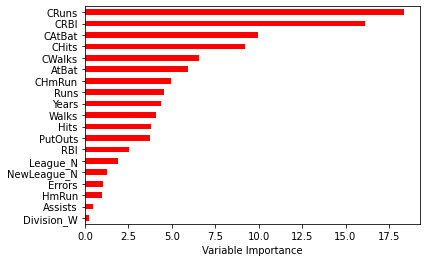

In [76]:
Importance = pd.DataFrame({'Importance':xgb_tuned.feature_importances_*100}, 
                          index = X_train.columns)


Importance.sort_values(by = 'Importance', 
                       axis = 0, 
                       ascending = True).plot(kind = 'barh', 
                                              color = 'r', )

plt.xlabel('Variable Importance')
plt.gca().legend_ = None

# LightGBM

In [77]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [84]:
#xgb eğitim süresi performansını arttırmaya yönelik geliştirdiği gbm türüdür.
#farklı strateyi split işleminde
#level wise(ağaç) büyüme yerine leaf (split)wise büyüme stratejisi kullanır.
#BFS DFS

In [78]:
!pip install lightgbm

In [79]:
conda install -c conda-forge lightgbm


Note: you may need to restart the kernel to use updated packages.


Traceback (most recent call last):
  File "D:\Programs\Anaconda\Scripts\conda-script.py", line 11, in <module>
    from conda.cli import main
ModuleNotFoundError: No module named 'conda'


In [80]:
from lightgbm import LGBMRegressor

## Model & Tahmin

In [85]:
lgb_model=LGBMRegressor().fit(X_train,y_train)

In [86]:
lgb_model

LGBMRegressor()

In [89]:
y_pred = lgb_model.predict(X_test)

In [90]:
np.sqrt(mean_squared_error(y_test, y_pred))

363.8712087611089

## Model Tuning

In [92]:
lgb_model = LGBMRegressor()
lgb_model

LGBMRegressor()

In [93]:
lgbm_params = {"learning_rate": [0.01, 0.1, 0.5, 1],
              "n_estimators": [20,40,100,200,500,1000],
              "max_depth": [1,2,3,4,5,6,7,8,9,10]}

In [94]:
lgbm_cv_model = GridSearchCV(lgb_model, 
                             lgbm_params, 
                             cv = 10, 
                             n_jobs = -1, 
                             verbose =2).fit(X_train, y_train)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 516 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done 1328 tasks      | elapsed:   29.6s
[Parallel(n_jobs=-1)]: Done 2393 out of 2400 | elapsed:   50.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed:   50.7s finished


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


In [95]:
lgbm_cv_model.best_params_

{'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 20}

In [96]:
lgbm_tuned=LGBMRegressor(learning_rate=0.1,max_depth=6,n_estimators=20).fit(X_train,y_train)

In [97]:
y_pred = lgbm_tuned.predict(X_test)

In [98]:
np.sqrt(mean_squared_error(y_test, y_pred))

371.5044868943621

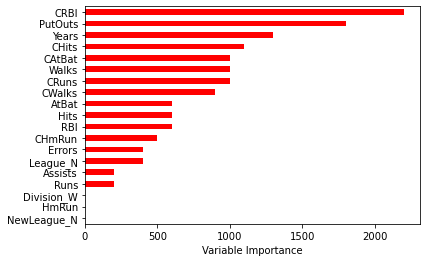

In [102]:
#Önem sırası

Importance = pd.DataFrame({'Importance':lgbm_tuned.feature_importances_*100}, 
                          index = X_train.columns)


Importance.sort_values(by = 'Importance', 
                       axis = 0, 
                       ascending = True).plot(kind = 'barh', 
                                              color = 'r', )

plt.xlabel('Variable Importance')
plt.gca().legend_ = None

# CatBoost

In [105]:
#kategorik değişkenler ile otomatik olarak mücadele edebilen hızlı başarılı gbm türevidir.
#gpu desteği
#daha başarılı tahmin
#rusyanın ilk açık kaynak kodlu ml çalışması

In [103]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])

y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [99]:
!pip install catboost

  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11434 sha256=b4702ae6eb18630a3e09f4a48f87bb128fd0a64fd0e1614df8b057b25a461c79
  Stored in directory: c:\users\asus\appdata\local\pip\cache\wheels\f9\8d\8d\f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


## Model & Tahmin

In [101]:
from catboost import CatBoostRegressor

In [106]:
catb_model = CatBoostRegressor().fit(X_train, y_train) 

Learning rate set to 0.029229
0:	learn: 438.1974206	total: 6.71ms	remaining: 6.7s
1:	learn: 432.4168868	total: 14.4ms	remaining: 7.19s
2:	learn: 426.3836690	total: 17.3ms	remaining: 5.73s
3:	learn: 420.2261014	total: 20.3ms	remaining: 5.06s
4:	learn: 414.9976675	total: 22.7ms	remaining: 4.51s
5:	learn: 409.6125323	total: 26.3ms	remaining: 4.36s
6:	learn: 403.9277911	total: 28.7ms	remaining: 4.07s
7:	learn: 398.4395285	total: 30.9ms	remaining: 3.83s
8:	learn: 392.4517081	total: 33.2ms	remaining: 3.65s
9:	learn: 387.4871123	total: 35.4ms	remaining: 3.5s
10:	learn: 382.6230510	total: 37.7ms	remaining: 3.39s
11:	learn: 378.1012454	total: 40.5ms	remaining: 3.33s
12:	learn: 372.6002306	total: 42.7ms	remaining: 3.24s
13:	learn: 368.4682192	total: 44.6ms	remaining: 3.14s
14:	learn: 364.0565766	total: 46.4ms	remaining: 3.05s
15:	learn: 359.5683249	total: 48.1ms	remaining: 2.96s
16:	learn: 355.1782794	total: 49.7ms	remaining: 2.87s
17:	learn: 350.4689946	total: 51.3ms	remaining: 2.8s
18:	learn: 

182:	learn: 139.0274540	total: 312ms	remaining: 1.39s
183:	learn: 138.4584181	total: 314ms	remaining: 1.39s
184:	learn: 138.2093063	total: 316ms	remaining: 1.39s
185:	learn: 137.8406250	total: 318ms	remaining: 1.39s
186:	learn: 137.7280816	total: 319ms	remaining: 1.39s
187:	learn: 137.2465993	total: 321ms	remaining: 1.39s
188:	learn: 136.7894765	total: 324ms	remaining: 1.39s
189:	learn: 136.4857311	total: 325ms	remaining: 1.39s
190:	learn: 136.0043713	total: 327ms	remaining: 1.39s
191:	learn: 135.7523177	total: 329ms	remaining: 1.39s
192:	learn: 135.3372675	total: 331ms	remaining: 1.39s
193:	learn: 135.0202084	total: 334ms	remaining: 1.39s
194:	learn: 134.7757422	total: 335ms	remaining: 1.38s
195:	learn: 134.3546545	total: 337ms	remaining: 1.38s
196:	learn: 133.9623627	total: 339ms	remaining: 1.38s
197:	learn: 133.2648869	total: 340ms	remaining: 1.38s
198:	learn: 132.9318972	total: 342ms	remaining: 1.38s
199:	learn: 132.5119098	total: 343ms	remaining: 1.37s
200:	learn: 131.8954412	tota

388:	learn: 75.3138222	total: 636ms	remaining: 998ms
389:	learn: 75.0125736	total: 637ms	remaining: 996ms
390:	learn: 74.9803725	total: 638ms	remaining: 994ms
391:	learn: 74.6113970	total: 640ms	remaining: 992ms
392:	learn: 74.3668766	total: 641ms	remaining: 991ms
393:	learn: 74.2752147	total: 644ms	remaining: 990ms
394:	learn: 74.2172412	total: 645ms	remaining: 988ms
395:	learn: 73.8652110	total: 646ms	remaining: 986ms
396:	learn: 73.6963645	total: 649ms	remaining: 986ms
397:	learn: 73.4075086	total: 651ms	remaining: 985ms
398:	learn: 73.0346771	total: 653ms	remaining: 984ms
399:	learn: 72.9971586	total: 655ms	remaining: 983ms
400:	learn: 72.6755493	total: 657ms	remaining: 982ms
401:	learn: 72.5972282	total: 659ms	remaining: 980ms
402:	learn: 72.4345974	total: 660ms	remaining: 978ms
403:	learn: 72.2185716	total: 662ms	remaining: 976ms
404:	learn: 71.9251032	total: 663ms	remaining: 974ms
405:	learn: 71.8901544	total: 664ms	remaining: 972ms
406:	learn: 71.5338422	total: 666ms	remaining:

558:	learn: 46.5061320	total: 950ms	remaining: 750ms
559:	learn: 46.4397708	total: 953ms	remaining: 749ms
560:	learn: 46.3904442	total: 956ms	remaining: 748ms
561:	learn: 46.2576989	total: 958ms	remaining: 747ms
562:	learn: 45.9568721	total: 961ms	remaining: 746ms
563:	learn: 45.8482033	total: 963ms	remaining: 744ms
564:	learn: 45.6689466	total: 964ms	remaining: 742ms
565:	learn: 45.4222796	total: 966ms	remaining: 741ms
566:	learn: 45.2404146	total: 967ms	remaining: 739ms
567:	learn: 45.0903054	total: 969ms	remaining: 737ms
568:	learn: 44.7991969	total: 971ms	remaining: 735ms
569:	learn: 44.6413756	total: 972ms	remaining: 733ms
570:	learn: 44.5799550	total: 973ms	remaining: 731ms
571:	learn: 44.5651506	total: 975ms	remaining: 730ms
572:	learn: 44.4233165	total: 978ms	remaining: 729ms
573:	learn: 44.2369747	total: 980ms	remaining: 727ms
574:	learn: 44.0545664	total: 981ms	remaining: 725ms
575:	learn: 43.9004385	total: 983ms	remaining: 723ms
576:	learn: 43.7138119	total: 984ms	remaining:

750:	learn: 26.9726665	total: 1.26s	remaining: 419ms
751:	learn: 26.9145554	total: 1.27s	remaining: 418ms
752:	learn: 26.8976495	total: 1.27s	remaining: 416ms
753:	learn: 26.8013163	total: 1.27s	remaining: 414ms
754:	learn: 26.7203712	total: 1.27s	remaining: 413ms
755:	learn: 26.5829005	total: 1.27s	remaining: 411ms
756:	learn: 26.4324310	total: 1.27s	remaining: 409ms
757:	learn: 26.2890218	total: 1.28s	remaining: 408ms
758:	learn: 26.1965245	total: 1.28s	remaining: 406ms
759:	learn: 26.1810870	total: 1.28s	remaining: 405ms
760:	learn: 26.1187072	total: 1.28s	remaining: 403ms
761:	learn: 26.0637705	total: 1.28s	remaining: 401ms
762:	learn: 25.9562461	total: 1.29s	remaining: 399ms
763:	learn: 25.8386943	total: 1.29s	remaining: 398ms
764:	learn: 25.7790725	total: 1.29s	remaining: 396ms
765:	learn: 25.6701106	total: 1.29s	remaining: 394ms
766:	learn: 25.6362119	total: 1.29s	remaining: 393ms
767:	learn: 25.6252040	total: 1.29s	remaining: 391ms
768:	learn: 25.5249470	total: 1.29s	remaining:

945:	learn: 15.7305450	total: 1.58s	remaining: 90.3ms
946:	learn: 15.6857434	total: 1.58s	remaining: 88.7ms
947:	learn: 15.6591016	total: 1.59s	remaining: 87ms
948:	learn: 15.6314256	total: 1.59s	remaining: 85.3ms
949:	learn: 15.5788777	total: 1.59s	remaining: 83.7ms
950:	learn: 15.5325554	total: 1.59s	remaining: 82ms
951:	learn: 15.4890930	total: 1.59s	remaining: 80.4ms
952:	learn: 15.4263779	total: 1.59s	remaining: 78.7ms
953:	learn: 15.3892307	total: 1.6s	remaining: 77ms
954:	learn: 15.3531641	total: 1.6s	remaining: 75.3ms
955:	learn: 15.3172544	total: 1.6s	remaining: 73.6ms
956:	learn: 15.2722481	total: 1.6s	remaining: 72ms
957:	learn: 15.2509946	total: 1.6s	remaining: 70.3ms
958:	learn: 15.2106080	total: 1.6s	remaining: 68.6ms
959:	learn: 15.1550705	total: 1.61s	remaining: 66.9ms
960:	learn: 15.1198927	total: 1.61s	remaining: 65.3ms
961:	learn: 15.0521121	total: 1.61s	remaining: 63.6ms
962:	learn: 15.0138282	total: 1.61s	remaining: 62ms
963:	learn: 14.9511473	total: 1.61s	remainin

In [290]:
dir(catb_model)

['__class__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__neq__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_base_calc_leaf_indexes',
 '_base_drop_unused_features',
 '_base_eval_metrics',
 '_base_predict',
 '_base_shrink',
 '_calc_fstr',
 '_calc_leaf_indexes',
 '_calc_ostr',
 '_check_is_regressor_loss',
 '_convert_to_asymmetric_representation',
 '_deserialize_model',
 '_estimator_type',
 '_eval_metrics',
 '_fit',
 '_get_borders',
 '_get_cat_feature_indices',
 '_get_float_feature_indices',
 '_get_params',
 '_get_tree_leaf_values',
 '_get_tree_splits',
 '_init_params',
 '_is_classification_objective',
 '_is_comparable_to',
 '_is_regression_objective',
 '

In [107]:
y_pred = catb_model.predict(X_test)

In [108]:
np.sqrt(mean_squared_error(y_test, y_pred))

350.2683163098795

## Model Tuning

In [111]:
catb_params = {"iterations": [200,500,100],
              "learning_rate": [0.01,0.1],
              "depth": [3,6,8]}

In [112]:
catb_model = CatBoostRegressor()

In [113]:
catb_cv_model = GridSearchCV(catb_model, 
                           catb_params, 
                           cv = 5, 
                           n_jobs = -1, 
                           verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  1.5min finished


0:	learn: 425.7900818	total: 923us	remaining: 184ms
1:	learn: 404.8723520	total: 1.77ms	remaining: 176ms
2:	learn: 387.4057666	total: 2.5ms	remaining: 164ms
3:	learn: 372.2801584	total: 3.17ms	remaining: 155ms
4:	learn: 358.9204229	total: 4.08ms	remaining: 159ms
5:	learn: 347.0083933	total: 4.91ms	remaining: 159ms
6:	learn: 336.0130818	total: 5.56ms	remaining: 153ms
7:	learn: 324.3923300	total: 6.31ms	remaining: 152ms
8:	learn: 314.8690957	total: 8.92ms	remaining: 189ms
9:	learn: 308.5075563	total: 9.85ms	remaining: 187ms
10:	learn: 298.8587285	total: 10.6ms	remaining: 183ms
11:	learn: 294.7655438	total: 11.4ms	remaining: 178ms
12:	learn: 288.0697862	total: 12.1ms	remaining: 175ms
13:	learn: 282.6697154	total: 13.2ms	remaining: 175ms
14:	learn: 277.6121667	total: 13.8ms	remaining: 171ms
15:	learn: 273.4383979	total: 14.4ms	remaining: 166ms
16:	learn: 269.1556201	total: 15.1ms	remaining: 162ms
17:	learn: 264.8098704	total: 15.7ms	remaining: 158ms
18:	learn: 261.6700768	total: 16.2ms	rem

In [115]:
catb_cv_model.best_params_

{'depth': 3, 'iterations': 200, 'learning_rate': 0.1}

In [116]:
catb_tuned=CatBoostRegressor(depth=3,iterations=200,learning_rate=0.1).fit(X_train,y_train)

0:	learn: 425.7900818	total: 691us	remaining: 138ms
1:	learn: 404.8723520	total: 1.44ms	remaining: 143ms
2:	learn: 387.4057666	total: 2.01ms	remaining: 132ms
3:	learn: 372.2801584	total: 2.55ms	remaining: 125ms
4:	learn: 358.9204229	total: 3.08ms	remaining: 120ms
5:	learn: 347.0083933	total: 3.75ms	remaining: 121ms
6:	learn: 336.0130818	total: 4.41ms	remaining: 122ms
7:	learn: 324.3923300	total: 5.1ms	remaining: 122ms
8:	learn: 314.8690957	total: 5.79ms	remaining: 123ms
9:	learn: 308.5075563	total: 6.46ms	remaining: 123ms
10:	learn: 298.8587285	total: 7.14ms	remaining: 123ms
11:	learn: 294.7655438	total: 7.8ms	remaining: 122ms
12:	learn: 288.0697862	total: 8.49ms	remaining: 122ms
13:	learn: 282.6697154	total: 9.13ms	remaining: 121ms
14:	learn: 277.6121667	total: 9.78ms	remaining: 121ms
15:	learn: 273.4383979	total: 10.4ms	remaining: 120ms
16:	learn: 269.1556201	total: 11.1ms	remaining: 119ms
17:	learn: 264.8098704	total: 11.7ms	remaining: 118ms
18:	learn: 261.6700768	total: 12.3ms	rema

In [117]:
y_pred = catb_tuned.predict(X_test)

In [118]:
np.sqrt(mean_squared_error(y_test, y_pred))

344.3125832615482

# MAKINE OGRENMESI GOREVLERININ OTOMATIKLESTIRILMESI

In [119]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])

In [122]:
def compML(df, y, alg):
    #train-test ayrimi
    y = df[y]
    X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
    X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)
    #modelleme
    model = alg().fit(X_train, y_train)
    y_pred = model.predict(X_test)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
    model_ismi = alg.__name__
    print(model_ismi, "Modeli Test Hatası:",RMSE)

In [123]:
compML(df, "Salary", SVR)

SVR Modeli Test Hatası: 460.0032657244849


In [124]:
models = [LGBMRegressor, 
          XGBRegressor, 
          GradientBoostingRegressor, 
          RandomForestRegressor, 
          DecisionTreeRegressor,
          MLPRegressor,
          KNeighborsRegressor, 
          SVR]

In [125]:
for i in models:
    compML(df, "Salary", i)
    

LGBMRegressor Modeli Test Hatası: 363.8712087611089
XGBRegressor Modeli Test Hatası: 355.46515176059927
GradientBoostingRegressor Modeli Test Hatası: 360.373012953624
RandomForestRegressor Modeli Test Hatası: 353.68374432737573
DecisionTreeRegressor Modeli Test Hatası: 522.6458975830808
MLPRegressor Modeli Test Hatası: 428.2329527043291
KNeighborsRegressor Modeli Test Hatası: 426.6570764525201
SVR Modeli Test Hatası: 460.0032657244849
